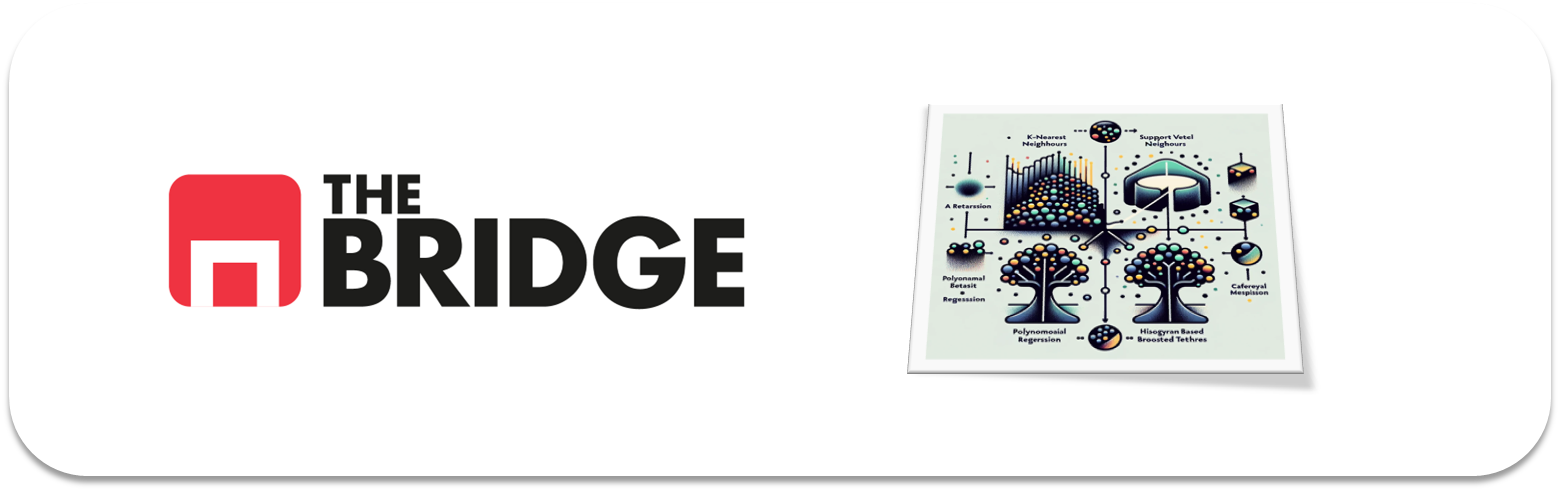

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    mean_absolute_percentage_error
)

from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler

np.random.seed(42)

import bootcampviztools as bvt

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [3]:
df = pd.read_csv("data/wines_dataset.csv", sep="|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Targets

- **Target clasificación:** `quality` (clases: 3,4,5,6,7,8,9).
- **Target regresión:** `alcohol` (float).

El dataset está bien, sin nulos, pero el target de clasificación está **muy desbalanceado**, por ejemplo `quality=9` tiene muy pocos casos, solo 5

In [5]:
# Targets
target_cls = "quality"
target_reg = "alcohol"

# Distribución de calidad
quality_counts = df[target_cls].value_counts().sort_index()
quality_prop = quality_counts / quality_counts.sum()

display(quality_counts)
display(quality_prop.rename("proporcion"))

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64

quality
3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: proporcion, dtype: float64

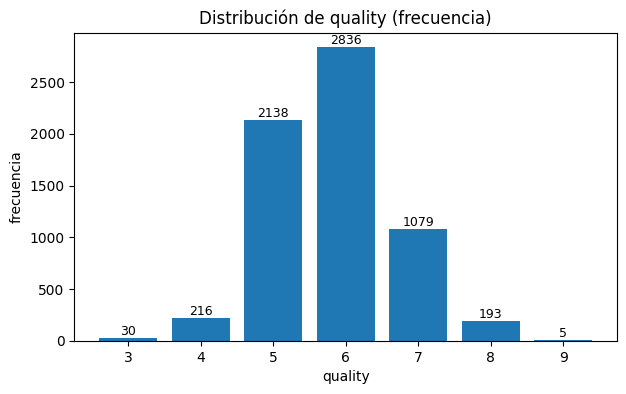

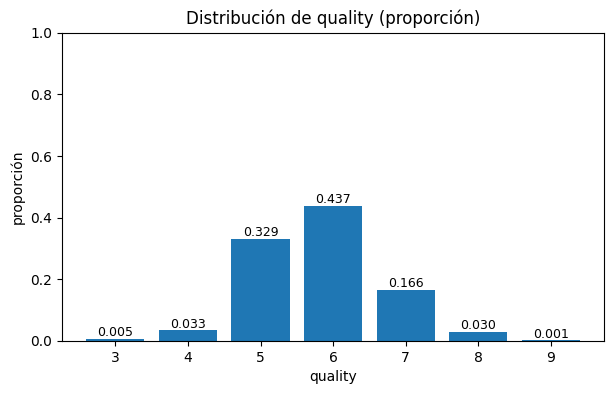

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(quality_counts.index.astype(str), quality_counts.values)
plt.title("Distribución de quality (frecuencia)")
plt.xlabel("quality"); plt.ylabel("frecuencia")
for i, v in enumerate(quality_counts.values):
    plt.text(i, v, str(int(v)), ha="center", va="bottom", fontsize=9)
plt.show()

plt.figure(figsize=(7,4))
plt.bar(quality_prop.index.astype(str), quality_prop.values)
plt.title("Distribución de quality (proporción)")
plt.xlabel("quality"); plt.ylabel("proporción")
for i, v in enumerate(quality_prop.values):
    plt.text(i, v, f"{v:.3f}", ha="center", va="bottom", fontsize=9)
plt.ylim(0, 1)
plt.show()


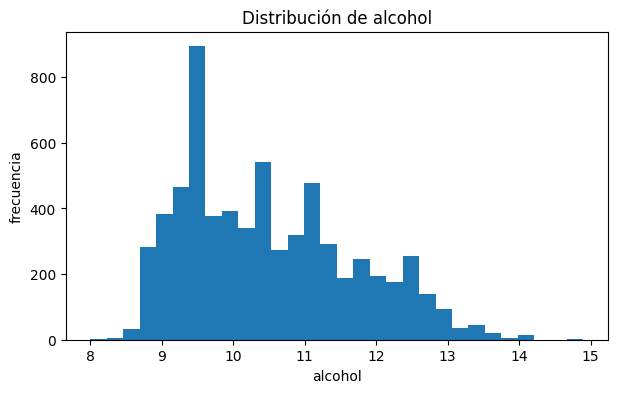

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [ ]:
# Distribución de alcohol
plt.figure(figsize=(7,4))
plt.hist(df[target_reg], bins=30)
plt.title("Distribución de alcohol")
plt.xlabel("alcohol"); plt.ylabel("frecuencia")
plt.show()

df[target_reg].describe()

- **Clasificación:** problema multiclase y **desbalanceado** → conviene usar **recall macro** y técnicas como `class_weight` o over/undersampling.
- **Regresión:** `alcohol` es continuo y se quiere un error porcentual bajo por lo que **MAPE** podría ser una métrica adecuada.

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [8]:

X_cls = df.drop(columns=[target_cls])
y_cls = df[target_cls].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in X_train.columns if c not in num_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_features),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_features),
    ]
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scoring = {"recall_macro": "recall_macro", "f1_macro": "f1_macro"}

def eval_cv(pipe):
    res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=1)
    return {
        "recall_macro_mean": float(np.mean(res["test_recall_macro"])),
        "recall_macro_std": float(np.std(res["test_recall_macro"])),
        "f1_macro_mean": float(np.mean(res["test_f1_macro"])),
    }


In [ ]:


pipe_knn5 = Pipeline(steps=[("prep", preprocessor), ("model", KNeighborsClassifier(n_neighbors=5))])
pipe_knn15 = Pipeline(steps=[("prep", preprocessor), ("model", KNeighborsClassifier(n_neighbors=15))])

pipe_lr = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced", n_jobs=-1))
])

pipe_rf = Pipeline(steps=[
    ("prep", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=80, random_state=42, class_weight="balanced_subsample",
        max_depth=12, n_jobs=-1
    ))
])

pipe_gb = Pipeline(steps=[("prep", preprocessor), ("model", GradientBoostingClassifier(random_state=42))])

# OverSampling en KNN
pipe_ros_knn15 = ImbPipeline(steps=[
    ("prep", preprocessor),
    ("ros", RandomOverSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=15))
])

results = [
    {"modelo": "LogReg (balanced)", **eval_cv(pipe_lr)},
    {"modelo": "KNN (k=5)", **eval_cv(pipe_knn5)},
    {"modelo": "KNN (k=15)", **eval_cv(pipe_knn15)},
    {"modelo": "GBClassifier", **eval_cv(pipe_gb)},
    {"modelo": "RandomForest (balanced)", **eval_cv(pipe_rf)},
    {"modelo": "ROS + KNN (k=15)", **eval_cv(pipe_ros_knn15)},
]

cv_cls_df = pd.DataFrame(results).sort_values("recall_macro_mean", ascending=False)
cv_cls_df


,modelo,recall_macro_mean,recall_macro_std,f1_macro_mean
0,LogReg (balanced),0.388792,0.086726,0.220214
5,ROS + KNN (k=15),0.351148,0.005635,0.258182
4,RandomForest (balanced),0.347314,0.012471,0.365409
3,GBClassifier,0.290422,0.007387,0.313416
1,KNN (k=5),0.258040,0.005299,0.269193
2,KNN (k=15),0.235922,0.000054,0.238860


- La métrica principal es **recall_macro**.
- En la ejecución, el mejor modelo por recall macro fue **Logistic Regression con `class_weight='balanced'`**.
- El balanceo con **RandomOverSampler** ayuda a KNN, pero no supera a Logistic Regression.

In [ ]:
# GridSearch

param_grid = {"model__C": [0.05, 0.1, 0.3, 1, 3, 10]}

grid_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid,
    scoring="recall_macro",
    cv=cv,
    n_jobs=1
)
grid_lr.fit(X_train, y_train)

print("Mejor recall_macro (CV):", grid_lr.best_score_)
print("Mejores params:", grid_lr.best_params_)


Mejor recall_macro (CV): 0.39707594127391577
Mejores params: {'model__C': 10}


              precision    recall  f1-score   support

           3      0.014     0.333     0.027         6
           4      0.090     0.372     0.145        43
           5      0.559     0.418     0.479       428
           6      0.629     0.236     0.344       567
           7      0.319     0.278     0.297       216
           8      0.061     0.385     0.106        39
           9      0.062     1.000     0.118         1

    accuracy                          0.313      1300
   macro avg      0.248     0.432     0.216      1300
weighted avg      0.517     0.313     0.365      1300



<Figure size 800x600 with 0 Axes>

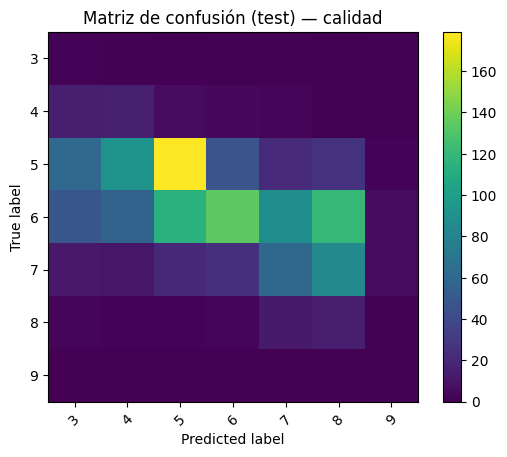

In [11]:
# Evaluación final en test
best_cls_model = grid_lr.best_estimator_
y_pred = best_cls_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3, zero_division=0))

labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(include_values=False)
plt.title("Matriz de confusión (test) — calidad")
plt.xticks(rotation=45)
plt.show()


### Análisis

- Al ser un problema **multiclase con para mi clases muy raras**, ocurre que:
  - hay ciertas clases, por ejemplo 9, que tienen unan métrica inestable.
- No se si una posible mejora podria sers:
  1. **Agrupar estas clases raras** por ejemplo 3-4 como “baja”, 5-6 “media”, 7-9 “alta”.
  2. Usar modelos que capturen no linealidades con más tuning, por ejemplo utilizando XGBoost / LightGBM si se permite.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [ ]:
X_reg = df.drop(columns=[target_reg])
y_reg = df[target_reg].astype(float)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

num_features_r = Xr_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features_r = [c for c in Xr_train.columns if c not in num_features_r]

preprocessor_r = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_features_r),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_features_r),
    ]
)

cv_r = KFold(n_splits=3, shuffle=True, random_state=42)
scoring_r = {"mape": "neg_mean_absolute_percentage_error", "rmse": "neg_root_mean_squared_error"}

def eval_cv_r(pipe):
    res = cross_validate(pipe, Xr_train, yr_train, cv=cv_r, scoring=scoring_r, n_jobs=1)
    return {
        "MAPE_mean": float(-np.mean(res["test_mape"])),
        "MAPE_std": float(np.std(-res["test_mape"])),
        "RMSE_mean": float(-np.mean(res["test_rmse"])),
    }


In [13]:
# Modelos a comparar (>=3)
pipe_lin = Pipeline(steps=[("prep", preprocessor_r), ("model", LinearRegression())])
pipe_ridge = Pipeline(steps=[("prep", preprocessor_r), ("model", Ridge())])
pipe_rf_r = Pipeline(steps=[("prep", preprocessor_r), ("model", RandomForestRegressor(
    n_estimators=200, random_state=42, n_jobs=-1, max_depth=14
))])
pipe_gb_r = Pipeline(steps=[("prep", preprocessor_r), ("model", GradientBoostingRegressor(random_state=42))])

results_r = [
    {"modelo": "LinearRegression", **eval_cv_r(pipe_lin)},
    {"modelo": "Ridge", **eval_cv_r(pipe_ridge)},
    {"modelo": "RandomForestRegressor", **eval_cv_r(pipe_rf_r)},
    {"modelo": "GradientBoostingRegressor", **eval_cv_r(pipe_gb_r)},
]

cv_reg_df = pd.DataFrame(results_r).sort_values("MAPE_mean")
cv_reg_df


,modelo,MAPE_mean,MAPE_std,RMSE_mean
2,RandomForestRegressor,0.028533,0.000562,0.422700
0,LinearRegression,0.033723,0.000058,0.510613
1,Ridge,0.033751,0.000052,0.510606
3,GradientBoostingRegressor,0.034400,0.000740,0.473652


**Comentario:** el mejor modelo por **MAPE** es **RandomForestRegressor**, en la ejecución, 0.028533 = 2.5833%.

## Optimización


In [14]:
# Por no utilizar siempre GridSearch, hago una optimización simple probando 3 configuraciones.

def cv_mape_for_rf(max_depth, min_samples_leaf, min_samples_split, n_estimators=120):
    pipe = Pipeline(steps=[
        ("prep", preprocessor_r),
        ("model", RandomForestRegressor(
            n_estimators=n_estimators,
            random_state=42,
            n_jobs=-1,
            max_depth=max_depth,
            min_samples_leaf=min_samples_leaf,
            min_samples_split=min_samples_split
        ))
    ])
    res = cross_validate(pipe, Xr_train, yr_train, cv=cv_r, scoring=scoring_r, n_jobs=1)
    return float(-np.mean(res["test_mape"])), float(-np.mean(res["test_rmse"]))

candidates = [
    {"max_depth": 12, "min_samples_leaf": 1, "min_samples_split": 2},
    {"max_depth": 16, "min_samples_leaf": 1, "min_samples_split": 2},
    {"max_depth": 16, "min_samples_leaf": 2, "min_samples_split": 5},
]

rows = []
for cand in candidates:
    mape, rmse = cv_mape_for_rf(**cand, n_estimators=120)
    rows.append({**cand, "MAPE_CV": mape, "RMSE_CV": rmse})

rf_tuning_df = pd.DataFrame(rows).sort_values("MAPE_CV")
rf_tuning_df


,max_depth,min_samples_leaf,min_samples_split,MAPE_CV,RMSE_CV
1,16,1,2,0.028250,0.422452
2,16,2,5,0.028725,0.426480
0,12,1,2,0.029519,0.430369


MAPE (test): 0.0254242664187083


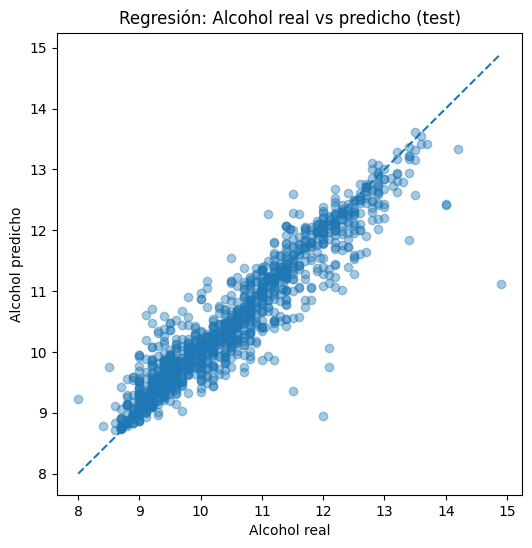

In [15]:
# Entrenamos el mejor y evaluamos en test
best_params = rf_tuning_df.iloc[0][["max_depth","min_samples_leaf","min_samples_split"]].to_dict()
best_params = {k: int(v) for k,v in best_params.items()}

best_rf_reg = Pipeline(steps=[
    ("prep", preprocessor_r),
    ("model", RandomForestRegressor(
        n_estimators=120, random_state=42, n_jobs=-1, **best_params
    ))
])

best_rf_reg.fit(Xr_train, yr_train)
yr_pred = best_rf_reg.predict(Xr_test)

mape_test = mean_absolute_percentage_error(yr_test, yr_pred)
print("MAPE (test):", mape_test)

# Gráfico real vs predicho
plt.figure(figsize=(6,6))
plt.scatter(yr_test, yr_pred, alpha=0.4)
plt.xlabel("Alcohol real")
plt.ylabel("Alcohol predicho")
plt.title("Regresión: Alcohol real vs predicho (test)")
minv = min(yr_test.min(), yr_pred.min())
maxv = max(yr_test.max(), yr_pred.max())
plt.plot([minv, maxv], [minv, maxv], linestyle="--")
plt.show()


In [16]:
# Análisis de errores: error porcentual y top casos con más error
err_pct = np.abs((yr_test - yr_pred) / yr_test)

analysis_reg = Xr_test.copy()
analysis_reg["alcohol_true"] = yr_test.values
analysis_reg["alcohol_pred"] = yr_pred
analysis_reg["abs_pct_error"] = err_pct.values

analysis_reg.sort_values("abs_pct_error", ascending=False).head(10)[
    ["alcohol_true","alcohol_pred","abs_pct_error","quality","class"]
]


,alcohol_true,alcohol_pred,abs_pct_error,quality,class
6086,12.0,8.940377,0.254969,6,white
2771,14.9,11.112917,0.254167,5,red
5274,12.1,9.760907,0.193313,6,red
4266,11.5,9.352944,0.186700,6,red
3483,12.1,10.065997,0.168099,6,red
4932,9.1,10.609444,0.165873,6,red
1650,9.2,10.709189,0.164042,5,red
6040,8.0,9.227111,0.153389,3,white
2477,8.5,9.751481,0.147233,3,white
730,9.2,10.473436,0.138417,5,white


### Ideas de mejora

- Probar modelos como **XGBoost/LightGBM**
- Ajustar mejor hiperparámetros